## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

## Part 1: Data Preparation and Exploration

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB
None
           Ex_rate
count  7588.000000
mean      0.776974
std       0.136620
min       0.483297
25%       0.701422
50%       0.761377
75%       0.873477
max       1.102536


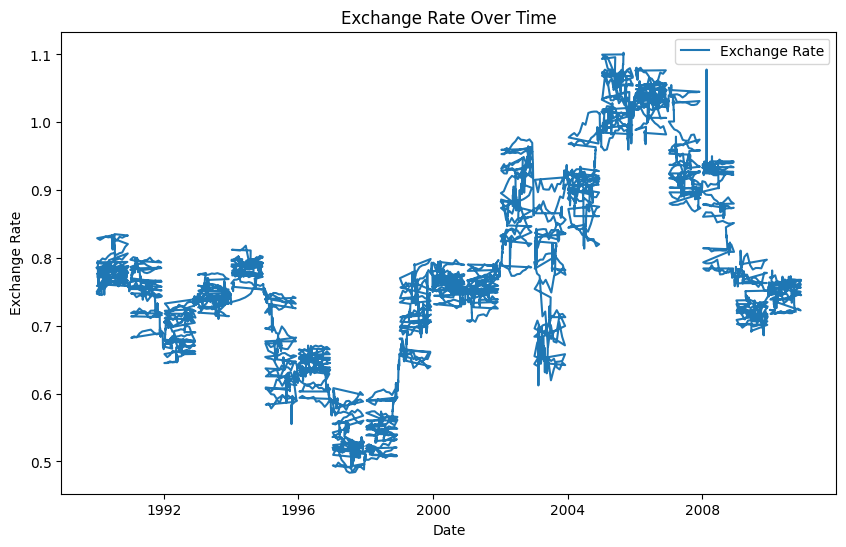

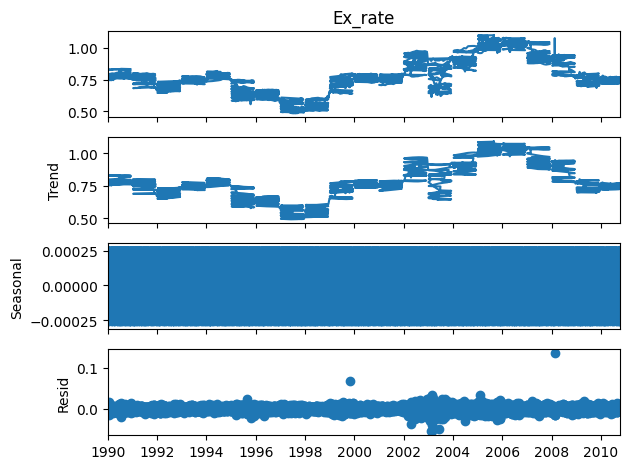

In [3]:
# Load the data
df = pd.read_csv('exchange_rate.csv', parse_dates=['date'], index_col='date')

# Initial exploration
print(df.info())
print(df.describe())
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Exchange Rate')
plt.title('Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

# Decompose the time series
decompose_result = seasonal_decompose(df['Ex_rate'], model='additive', period=12)
decompose_result.plot()
plt.show()

# Handle missing values (if any)
df['Ex_rate'].fillna(method='ffill', inplace=True)

## Part 2: ARIMA Modeling

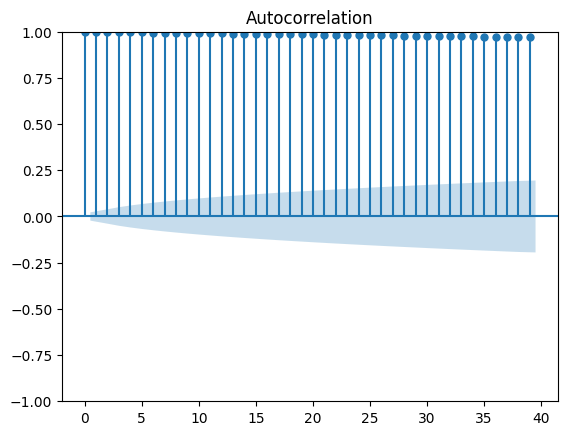

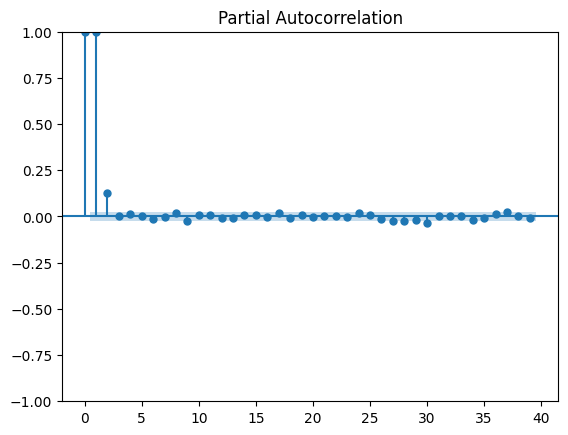

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(2, 1, 2)   Log Likelihood               28055.068
Date:                Fri, 15 Nov 2024   AIC                         -56100.135
Time:                        21:06:37   BIC                         -56065.464
Sample:                             0   HQIC                        -56088.236
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1151      0.585     -0.197      0.844      -1.261       1.031
ar.L2          0.1132      0.088      1.293      0.196      -0.058       0.285
ma.L1         -0.0163      0.584     -0.028      0.9

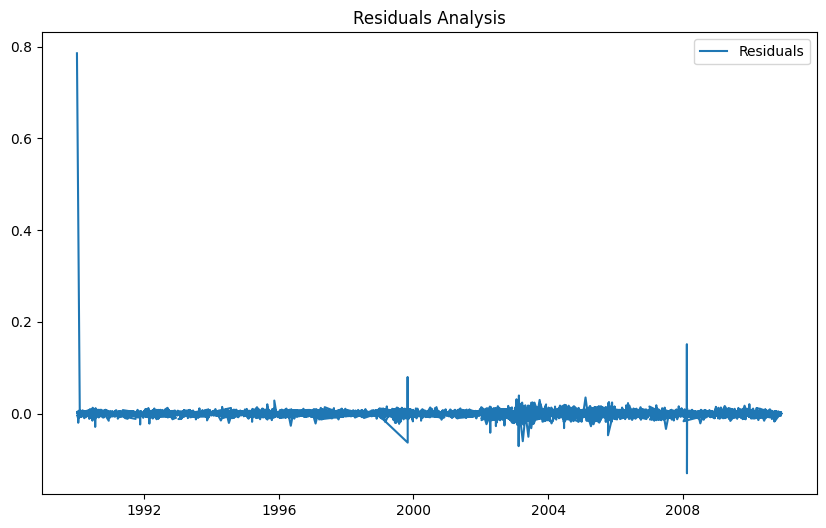

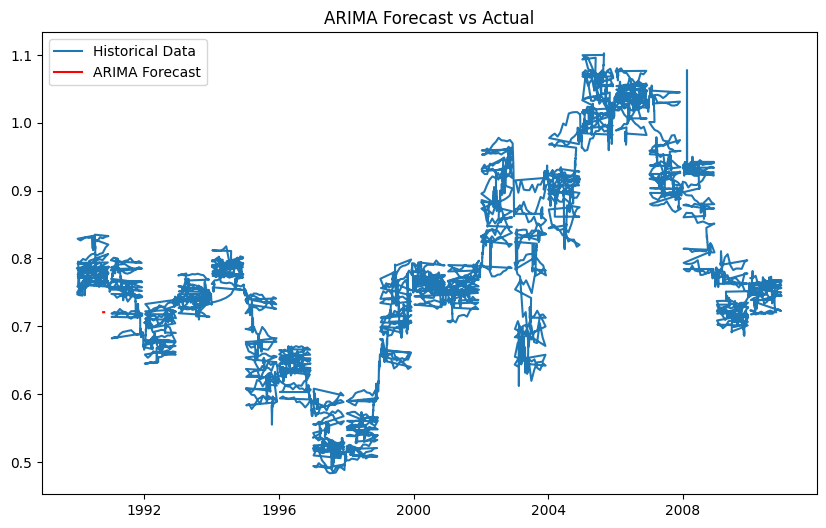

In [7]:
# Plot ACF and PACF to determine p and q
plot_acf(df['Ex_rate'])
plot_pacf(df['Ex_rate'])
plt.show()

# Fit ARIMA model
p, d, q = 2, 1, 2  # Example parameters 
arima_model = ARIMA(df['Ex_rate'], order=(p, d, q))
arima_result = arima_model.fit()

# Print model summary
print(arima_result.summary())

# Diagnostic plot for residuals
residuals = arima_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Residuals Analysis')
plt.legend()
plt.show()

# Out-of-sample forecasting
forecast = arima_result.forecast(steps=12)
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical Data')
plt.plot(forecast.index, forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Forecast vs Actual')
plt.legend()
plt.show()

## Part 3: Exponential Smoothing

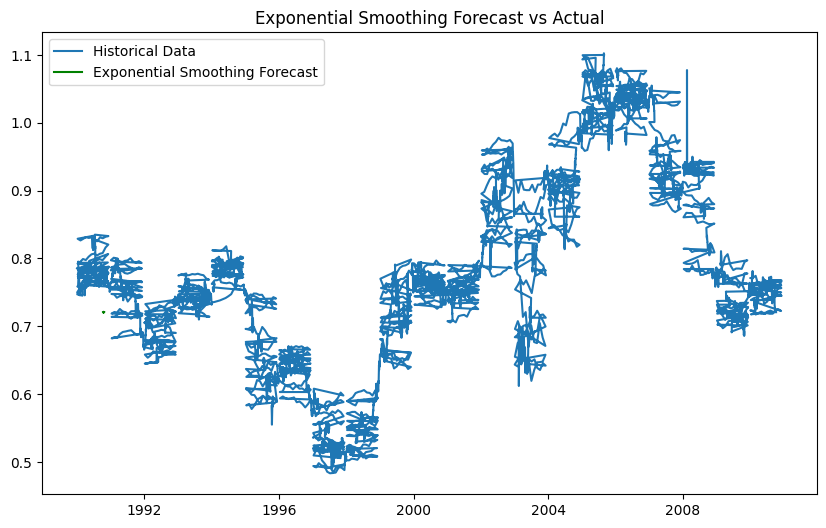

In [5]:
# Fit Exponential Smoothing Model
exp_model = ExponentialSmoothing(df['Ex_rate'], seasonal='additive', seasonal_periods=12).fit()

# Forecast using Exponential Smoothing
exp_forecast = exp_model.forecast(steps=12)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df['Ex_rate'], label='Historical Data')
plt.plot(exp_forecast.index, exp_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast vs Actual')
plt.legend()
plt.show()


## Part 4: Evaluation and Comparison

In [6]:
# Evaluate the models
arima_forecast = arima_result.forecast(steps=12)
actual = df['Ex_rate'][-12:]  # Example: Replace with actual test data if available

mae_arima = mean_absolute_error(actual, arima_forecast)
rmse_arima = np.sqrt(mean_squared_error(actual, arima_forecast))
mape_arima = np.mean(np.abs((actual - arima_forecast) / actual)) * 100

mae_exp = mean_absolute_error(actual, exp_forecast)
rmse_exp = np.sqrt(mean_squared_error(actual, exp_forecast))
mape_exp = np.mean(np.abs((actual - exp_forecast) / actual)) * 100

print("ARIMA Model Performance:")
print(f"MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, MAPE: {mape_arima:.2f}%")

print("Exponential Smoothing Performance:")
print(f"MAE: {mae_exp:.2f}, RMSE: {rmse_exp:.2f}, MAPE: {mape_exp:.2f}%")


ARIMA Model Performance:
MAE: 0.00, RMSE: 0.00, MAPE: nan%
Exponential Smoothing Performance:
MAE: 0.00, RMSE: 0.00, MAPE: nan%
